# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import pandas as pd
import numpy as np
import requests
from citipy import citipy
from config import weather_api_key
import matplotlib.pyplot as plt
import scipy.stats as st
from datetime import datetime

## Generate Cities List

In [2]:
# Number of random locations
nsamples=1500

# Generating random longitudes and latitudes and putting them in a DataFrame
lat=np.random.uniform(-90,90,nsamples)
lng=np.random.uniform(-180,180,nsamples)
city_location=pd.DataFrame({"Latitude":lat , "Longitude":lng})
city_location.head()

,Latitude,Longitude
0,-0.666793,37.904262
1,28.454453,67.247244
2,32.733437,-61.899631
3,-44.823805,-29.245418
4,73.420032,-138.466139


In [3]:
# Associating the generated locations with nearby cities using citipy
city_list=[]

for index, row in city_location.iterrows():
    city = citipy.nearest_city(row["Latitude"], row["Longitude"]).city_name
    city_list.append(city)

len(city_list)

1500

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_df=pd.DataFrame({"City":city_list})

# Removing duplicate cities from DataFrame
city_df=city_df.drop_duplicates(["City"],keep="first")


count_cities=len(city_df["City"])
count_record=1
count_set=1

print("-----------------------------")
print("Beginning Data Retrieval")
print("-----------------------------")

main_url="https://api.openweathermap.org/data/2.5/weather"

# API calls
for index, row in city_df.iterrows():
    try:
        city=row["City"]
        
        params={"q":city , "units":"imperial" , "appid":weather_api_key}
        
        response = requests.get(main_url,params).json()

        city_df.loc[index,"City"]=response["name"]  
        city_df.loc[index,"Lat"]=response["coord"]["lat"]    
        city_df.loc[index,"Lng"]=response["coord"]["lon"]   
        city_df.loc[index,"Max Temp"]=response["main"]["temp_max"]   
        city_df.loc[index,"Humidity"]=response["main"]["humidity"]   
        city_df.loc[index,"Cloudiness"]=response["clouds"]["all"]   
        city_df.loc[index,"Wind Speed"]=response["wind"]["speed"]   
        city_df.loc[index,"Country"]=response["sys"]["country"]   
        city_df.loc[index,"Date"]=response["dt"]   

        if count_record>48:
            print(f"Processing Record {count_record} of Set {count_set} | {city}")
            count_record=1
            count_set+=1

        else:
            print(f"Processing Record {count_record} of Set {count_set} | {city}")
            count_record+=1
            
    except:    
        print(f"City not found. Skipping...")

print("-----------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------")


-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | mwingi
Processing Record 2 of Set 1 | bhag
Processing Record 3 of Set 1 | saint george
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | aklavik
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | shelburne
Processing Record 11 of Set 1 | kununurra
Processing Record 12 of Set 1 | severo-kurilsk
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | upernavik
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | bud
Processing Record 22 of Set 1 | zhigansk
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_df=city_df.dropna()
city_df.to_csv("weather_output.csv", index=False)
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mwingi,-0.9344,38.0601,81.68,40.0,67.0,11.99,KE,1.627036e+09
1,Bhag,29.0415,67.8239,110.82,17.0,2.0,5.23,PK,1.627036e+09
2,Saint George,37.1041,-113.5841,76.62,82.0,1.0,3.00,US,1.627036e+09
3,Arraial do Cabo,-22.9661,-42.0278,58.86,94.0,40.0,2.30,BR,1.627036e+09
4,Aklavik,68.2191,-135.0107,52.52,92.0,32.0,10.60,CA,1.627036e+09
...,...,...,...,...,...,...,...,...,...
1484,Kaitong,44.8135,123.1500,86.70,37.0,45.0,19.06,CN,1.627037e+09
1485,Kumul,42.8000,93.4500,93.79,27.0,100.0,16.51,CN,1.627037e+09
1486,Marabu,4.4148,114.0089,86.14,79.0,20.0,4.61,MY,1.627037e+09
1494,Sisimiut,66.9395,-53.6735,41.23,92.0,100.0,10.36,GL,1.627037e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.

city_df.loc[city_df["Humidity"]>100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data=city_df.loc[city_df["Humidity"]<101]
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mwingi,-0.9344,38.0601,81.68,40.0,67.0,11.99,KE,1.627036e+09
1,Bhag,29.0415,67.8239,110.82,17.0,2.0,5.23,PK,1.627036e+09
2,Saint George,37.1041,-113.5841,76.62,82.0,1.0,3.00,US,1.627036e+09
3,Arraial do Cabo,-22.9661,-42.0278,58.86,94.0,40.0,2.30,BR,1.627036e+09
4,Aklavik,68.2191,-135.0107,52.52,92.0,32.0,10.60,CA,1.627036e+09
...,...,...,...,...,...,...,...,...,...
1484,Kaitong,44.8135,123.1500,86.70,37.0,45.0,19.06,CN,1.627037e+09
1485,Kumul,42.8000,93.4500,93.79,27.0,100.0,16.51,CN,1.627037e+09
1486,Marabu,4.4148,114.0089,86.14,79.0,20.0,4.61,MY,1.627037e+09
1494,Sisimiut,66.9395,-53.6735,41.23,92.0,100.0,10.36,GL,1.627037e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

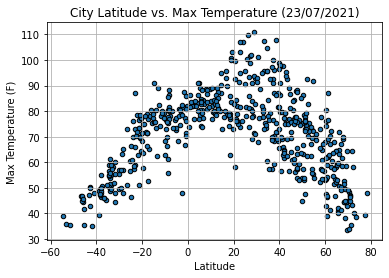

In [8]:
# Exporting date
timestamp=clean_city_data["Date"][0]
date=datetime.fromtimestamp(timestamp).strftime("(%d/%m/%Y)")

# Scatter plot
clean_city_data.plot.scatter(x='Lat', y='Max Temp', edgecolors = "black")
plt.grid(True)
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../Images/lat_vs_temp.png", facecolor="white")


## Latitude vs. Humidity Plot

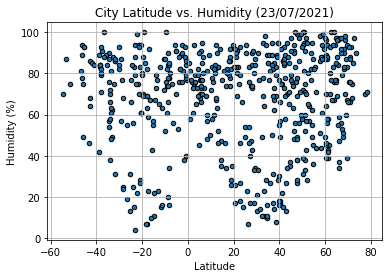

In [9]:
clean_city_data.plot.scatter(x='Lat', y='Humidity', edgecolors = "black")
plt.grid(True)
plt.title(f"City Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/lat_vs_humidity.png", facecolor="white")

## Latitude vs. Cloudiness Plot

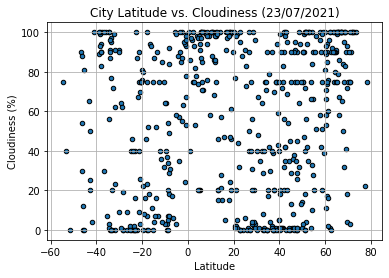

In [10]:
clean_city_data.plot.scatter(x='Lat', y='Cloudiness', edgecolors = "black")
plt.grid(True)
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/lat_vs_cloudiness.png", facecolor="white")

## Latitude vs. Wind Speed Plot

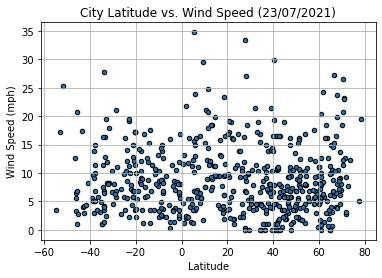

In [11]:
clean_city_data.plot.scatter(x='Lat', y='Wind Speed', edgecolors = "black")
plt.grid(True)
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Images/lat_vs_windspeed.png", facecolor="white")

## Linear Regression

The r-value is: -0.664077509674302


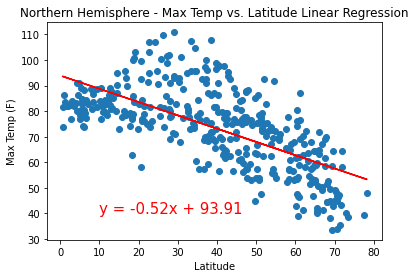

In [12]:
northern_hemisphere=clean_city_data[clean_city_data["Lat"]>=0]

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/lat_vs_temp_northern.png", facecolor="white")
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8379738952626093


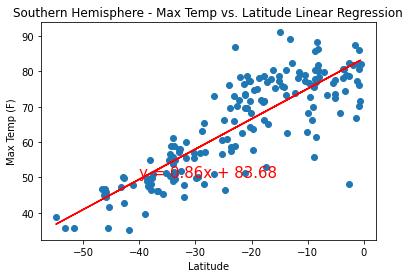

In [13]:
southern_hemisphere=clean_city_data[clean_city_data["Lat"]<0]

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,50),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/lat_vs_temp_southern.png", facecolor="white")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.08016585009682525


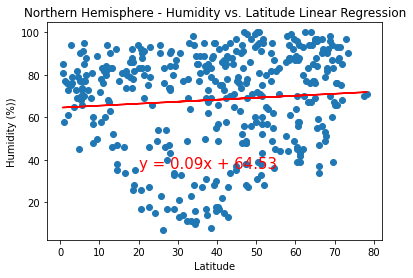

In [14]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%))")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/lat_vs_humidity_northern.png", facecolor="white")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.0624136166765117


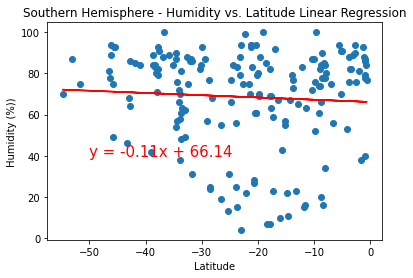

In [15]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%))")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/lat_vs_humidity_southern.png", facecolor="white")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03486480454006079


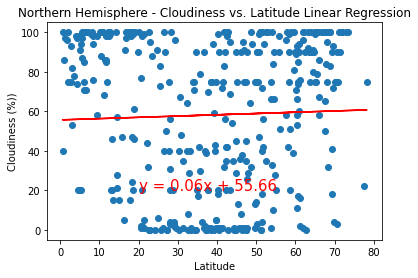

In [16]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%))")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/lat_vs_cloudiness_northern.png", facecolor="white")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.006649253152964681


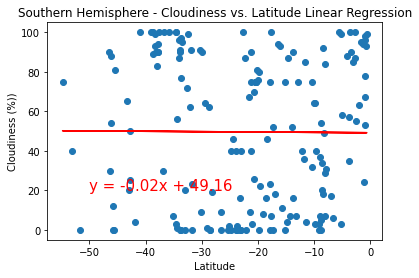

In [17]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%))")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/lat_vs_cloudiness_southern.png", facecolor="white")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.07207552217253332


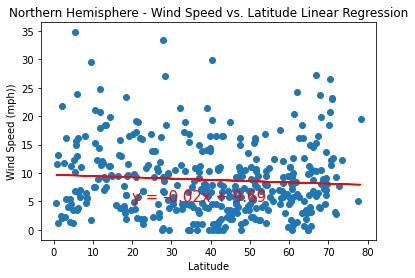

In [18]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph))")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/lat_vs_windspeed_northern.png", facecolor="white")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.10098652877523837


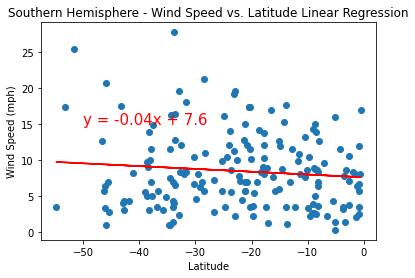

In [19]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/lat_vs_windspeed_southern.png", facecolor="white")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

# Observations

## 1. There is a good correlation between temperature and latitude, proving that temperature decreases as the city moves away from the equator.
## 2. There is no sensible correlation between humidity and latitude.
## 3. There is no sensible correlation between cloudiness and latitude. In northern hemisphere there seems to be a significant number of cities with cloudiness over 80%.
## 4. There is also no specific correlation between windspeed and latitude. Wind speed is ranging between 0 to 15 mph in both hemispheres.